## 1. Problem staterment

1.	To predict whether a liability customer will buy a personal loan or not.
2.	Which variables are most significant.
3.	Which segment of customers should be targeted more.


### Import libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# Libraries to help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit from the number of displayed columns and rows.
pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 200)

# for statistical analysis 
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve, f1_score


## 2. Load data

In [2]:
df = pd.read_csv('Loan_Modelling.csv')

In [3]:
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## 3.Exploratory Data analysis

### 3.1 shape and data type

In [4]:
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns.')  # f-string

There are 5000 rows and 14 columns.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


#### insights:

1. There is no missing values in columns.
2. `ZIPCode` column is actually categorical type instead of continuous type.


### 3.b Basic summary statistics and consequences

#### Central Tendency of data

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


#### Insights:

1. `Id`: column can be dropped as it is simple Id.
2. `Age`: minmum age is 23 and maximum age is 67 with mean 45.33.
3. `Exprience`: minimum exprience is  -3 which is not possible and need to be treated. MAximu exprience is 43 with mean 20.
4. `Income` : minimum income 8 thounsand dollar and maximum is 224 with mean value 73.774. this column has some positive skewness and outliers too.
5. `ZIP code` : is actually categorical variable and it should be converted into categorical or string.
6. `family` : Minimum family size is 1  and maximum is 4. family is also categorical variable.
7. `CCAvg` : Minimum average spending on credit card is 0 and maximum is 10 thousand dollar with mean value 1.93 and median 1.5 thousand dollar. This column seems positive skew and have some outliers.
8. `Education` : it is categorical variable.
9. `Mortgage` : minimum mortgage is 0 and maximum is 635. Also 25% an 50% are also 0. This column definetely has positive skewness and outliers.
10. `Personal_loan`,`Securities_Account`,`CD_Account`,`Online`,`creditCard`: all of these variables are categorical.
11. `Personal_loan` : is target variable.

#### Skewness

In [7]:
df.skew()

ID                    0.000000
Age                  -0.029341
Experience           -0.026325
Income                0.841339
ZIPCode              -0.296165
Family                0.155221
CCAvg                 1.598443
Education             0.227093
Mortgage              2.104002
Personal_Loan         2.743607
Securities_Account    2.588268
CD_Account            3.691714
Online               -0.394785
CreditCard            0.904589
dtype: float64

#### Insights :
1. Age, Experience are negatively skewed columns.
2. Income, CCAvg, Mortgage are positively skewed columns.

#### Checking caterogies for categorical variables

In [8]:
cat_column = ['Personal_Loan','Securities_Account','CD_Account','Online','CreditCard','Education']

for col in cat_column:
    value_counts = df[col].value_counts(dropna=False)
    print(value_counts)
    print('\n\n')

0    4520
1     480
Name: Personal_Loan, dtype: int64



0    4478
1     522
Name: Securities_Account, dtype: int64



0    4698
1     302
Name: CD_Account, dtype: int64



1    2984
0    2016
Name: Online, dtype: int64



0    3530
1    1470
Name: CreditCard, dtype: int64



1    2096
3    1501
2    1403
Name: Education, dtype: int64





### 3.c Preprocessing of Data

### Treat Experience columns as it has -ve values too

As there is no logic to have -ve experience so we can remove -ve sign from the values considering it is a typo.

In [9]:
df['Experience'].value_counts()

 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 14    127
 16    127
 30    126
 34    125
 27    125
 17    125
 29    124
 22    124
 7     121
 8     119
 6     119
 15    119
 10    118
 33    117
 13    117
 11    116
 37    116
 36    114
 21    113
 4     113
 31    104
 12    102
 38     88
 39     85
 2      85
 1      74
 0      66
 40     57
 41     43
-1      33
-2      15
 42      8
-3       4
 43      3
Name: Experience, dtype: int64

In [10]:
##Replacing positive values whenever there is negative value
df['Experience'] = df['Experience'].apply(lambda x: np.abs(x) if x < 0 else x)

In [11]:
df[df['Experience']< 0]['Experience'].sum()

0

### Treat zip code
1. convert into String variable
2. Create new column  based on first 3 numbersof ZIPCode

In [12]:
#### Type conversion
df['ZIPCode']=df['ZIPCode'].astype('str')

In [13]:
df['ZIPCode'].dtype

dtype('O')

In [14]:
df['ZIPCode'].nunique()

467

In [15]:
df['ZIPCode'].unique()

array(['91107', '90089', '94720', '94112', '91330', '92121', '91711',
       '93943', '93023', '94710', '90277', '93106', '94920', '91741',
       '95054', '95010', '94305', '91604', '94015', '90095', '91320',
       '95521', '95064', '90064', '94539', '94104', '94117', '94801',
       '94035', '92647', '95814', '94114', '94115', '92672', '94122',
       '90019', '95616', '94065', '95014', '91380', '95747', '92373',
       '92093', '94005', '90245', '95819', '94022', '90404', '93407',
       '94523', '90024', '91360', '95670', '95123', '90045', '91335',
       '93907', '92007', '94606', '94611', '94901', '92220', '93305',
       '95134', '94612', '92507', '91730', '94501', '94303', '94105',
       '94550', '92612', '95617', '92374', '94080', '94608', '93555',
       '93311', '94704', '92717', '92037', '95136', '94542', '94143',
       '91775', '92703', '92354', '92024', '92831', '92833', '94304',
       '90057', '92130', '91301', '92096', '92646', '92182', '92131',
       '93720', '908

In [16]:
### adding new column based on ZIPCode starting 3 numbers

df['Area'] = df['ZIPCode'].apply(lambda x: x[0:3])
df['Area'] 

0       911
1       900
2       947
3       941
4       913
       ... 
4995    926
4996    920
4997    930
4998    900
4999    926
Name: Area, Length: 5000, dtype: object

In [17]:
df['Area'].nunique()

57

In [18]:
df['Area']=df['Area'].astype('category')

#### Top 10 Areas with customers accepted personal loans

In [19]:
df_loan = df[['Personal_Loan','Area']].groupby('Area').count().sort_values(by = 'Personal_Loan',ascending=False).reset_index()
df_loan.columns = ['Area','loan_Count']
df_loan.head(10)

,Area,loan_Count
0,900,375
1,921,279
2,950,267
3,945,264
4,943,257
5,941,257
6,947,251
7,920,248
8,940,242
9,913,222


In [20]:
df_loan.tail(10)

,Area,loan_Count
47,952,13
48,914,13
49,922,10
50,936,8
51,942,7
52,912,7
53,966,6
54,961,5
55,918,3
56,903,2


### 3.d Univariate and Bivariate Analysis

### Univariant Plots continuous variables

In [21]:
##Methods to plot box plot and histgram for  features
def histgram_BoxPlot(feature, figsize=(15,10)):
    f2, (ax_box, ax_hist) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                  sharex = True, # x-axis will be shared among all subplots
                  gridspec_kw = {"height_ratios": (.25, .75)}, 
                  figsize = figsize 
                 ) # creating the 2 subplots
    sns.distplot(feature,ax=ax_hist, kde= True)
    sns.boxplot(feature, ax=ax_box,showmeans=True, color= 'Green')
    ax_hist.axvline(np.mean(feature), color='g', linestyle='--')# Add mean to the histogram
    ax_hist.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

#### plots for Age

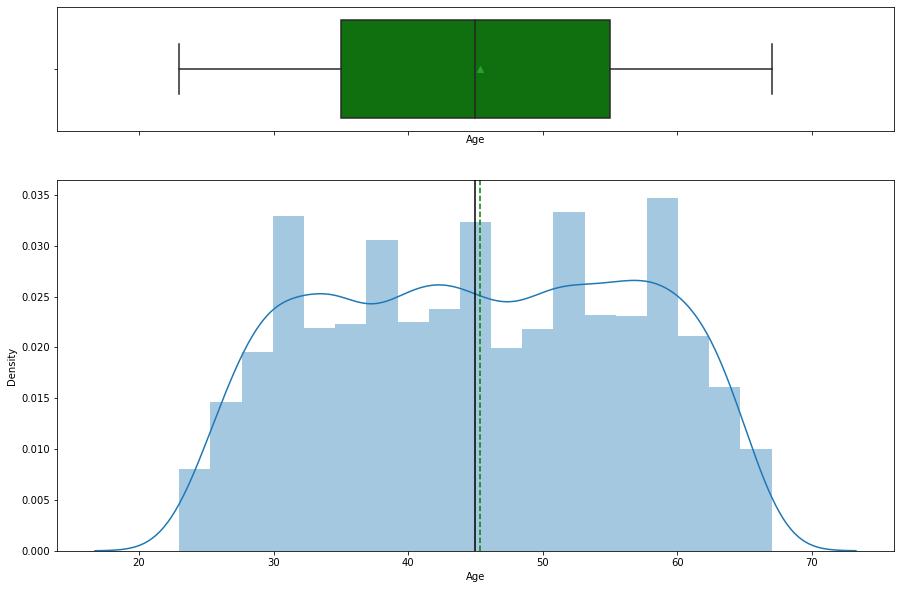

In [22]:
histgram_BoxPlot(df['Age']);

#### Plot for Income

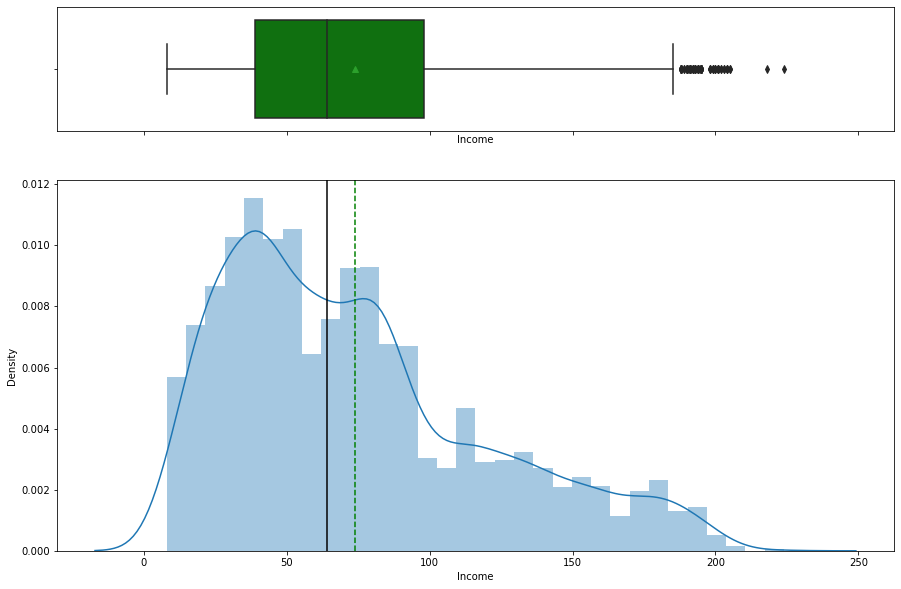

In [23]:
histgram_BoxPlot(df['Income']);

#### Plot for CCAvg

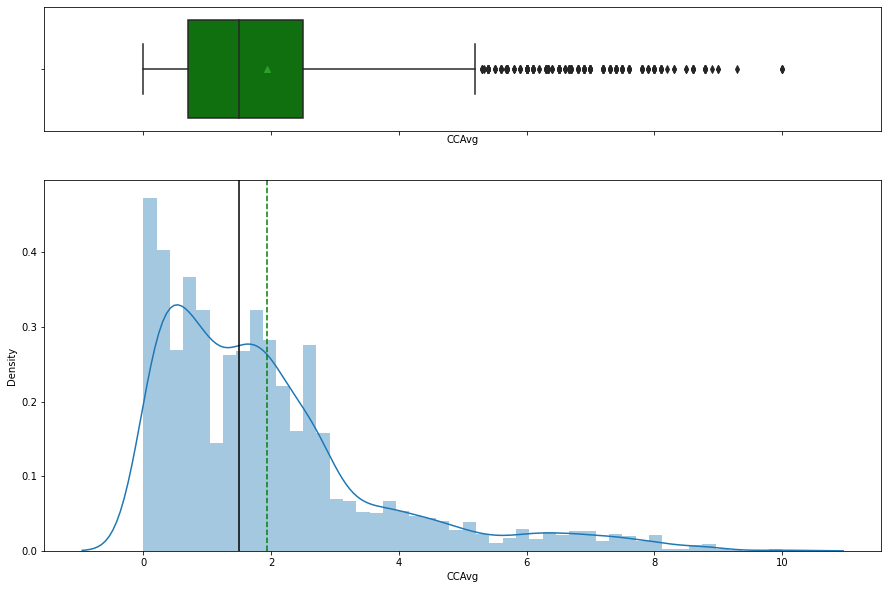

In [24]:
histgram_BoxPlot(df['CCAvg']);

#### Plot for Mortgage

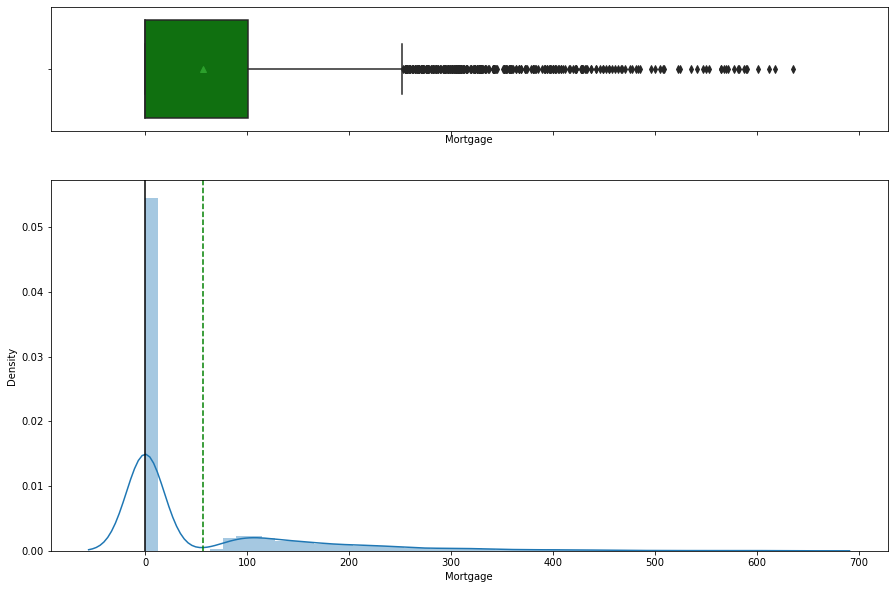

In [25]:
histgram_BoxPlot(df['Mortgage']);

#### Plot for Experience

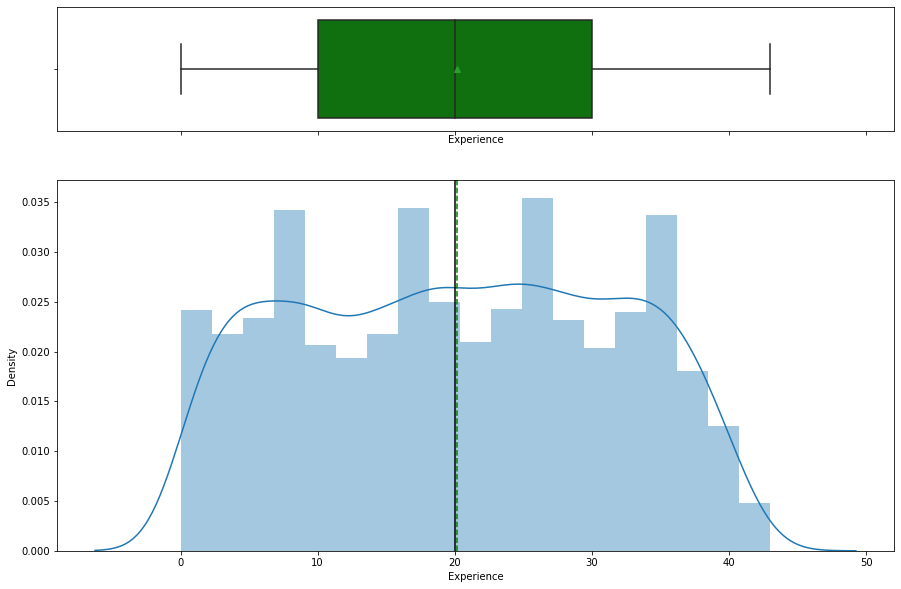

In [26]:
histgram_BoxPlot(df['Experience']);

#### Insights:
1. `Age` : There is no outliers in experience variable and no signficant skewness.
2. `Income` : Income variable has outliers and is positively skewed. We need to handle outliers and skewness.
3. `CCAvg` : CCAvg variable has too many outlier and is also positive skewed. we need logarithmic conversion for treating this variable.
4. `Mortgage` : Mortgage variable has too many outlier and is highly positive skewed. we need logarithmic conversion for treating this variable.
5. `Experience` : There is no outliers in experience variable and no signficant skewness.

### Univariant plot for categorical variables

In [27]:
##Method to plot bar plot with percentage for each category of featrure
def barPlot_percentDist(feature):
    total = len(df[feature])# total size of column
    plt.figure(figsize=(10,5))
    plt.xticks(rotation=45)
    ax=sns.countplot(df[feature],palette='Paired')
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        
        ax.annotate(percentage, (x, y), size = 15) # annotate the percantage 
    plt.show() # show the plot
  

#### Plot for Family

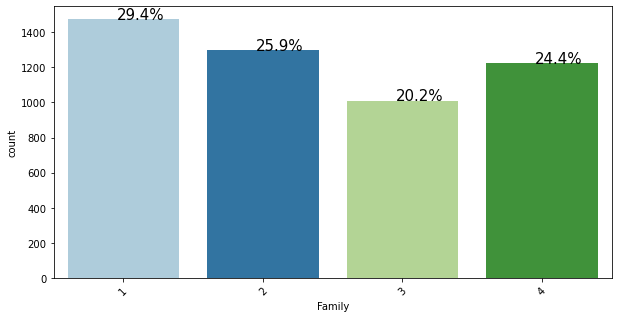

In [28]:
barPlot_percentDist('Family')

#### Plot for Education

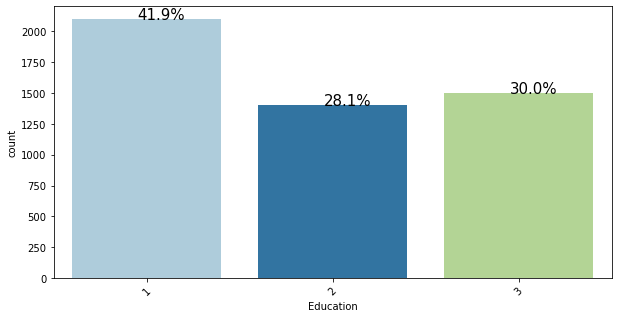

In [29]:
barPlot_percentDist('Education')

#### Plot for Personal Loan

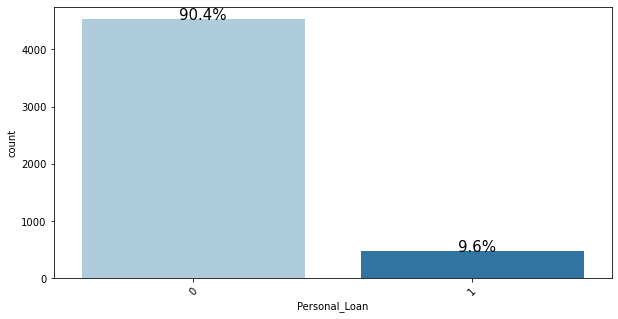

In [30]:
barPlot_percentDist('Personal_Loan')

#### Plot for security account

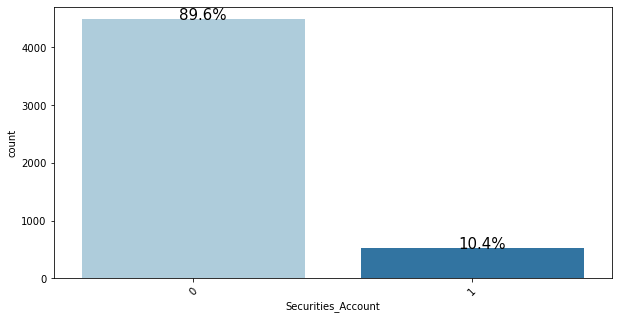

In [31]:
barPlot_percentDist('Securities_Account')

#### Plot for certificate of deposite Account

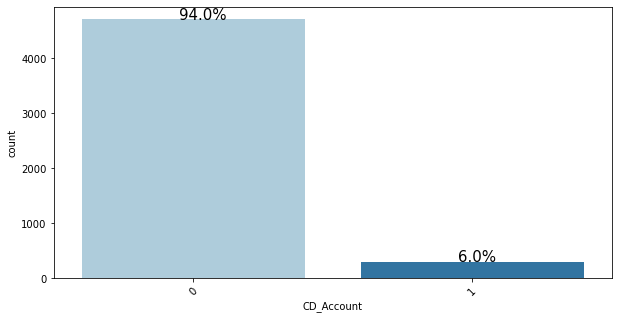

In [32]:
barPlot_percentDist('CD_Account')

#### Plot for Online

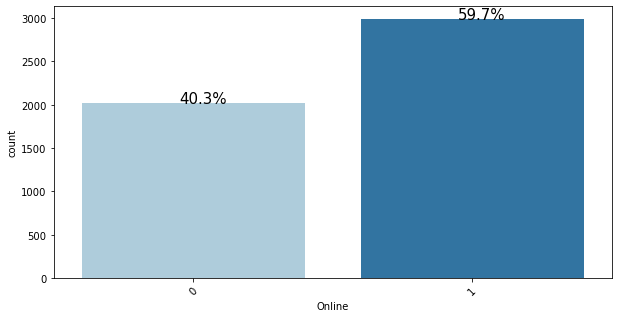

In [33]:
barPlot_percentDist('Online')

#### Plot for CreditCard

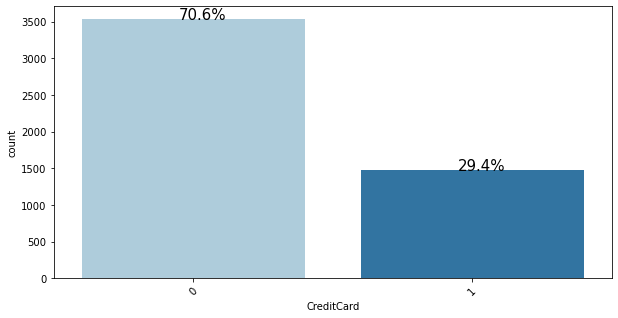

In [34]:
barPlot_percentDist('CreditCard')

#### Insights:

1. `Family`: 29.4% families are of size 1, 25.9% families are of size 2, 20.2% families are of size 3 and 24.4% families are of size 4.
2. `Education` : 41.9% customers are undergrad, 28.1% are grad and 30.0% customers are advanced/professional by education.
3. `Personal_Loan` : Only 9.6% customer had accepted the personal loan offered in the last campaign.
4. `Securities_Account` : Only 10.4% customers have securities account with the bank.
5. `CD_Account`: Only 6.0% customer have a certificate of deposit (CD) account with the bank.
6. `Online`: 59.7% customer use internet banking.
7. `CreditCard`: there are only 29.4% customer using credit card issued by other bank.

### Bivariant Plots

#### pair plot
plotting relationship of continuous variables with each other and personal_Loan variable

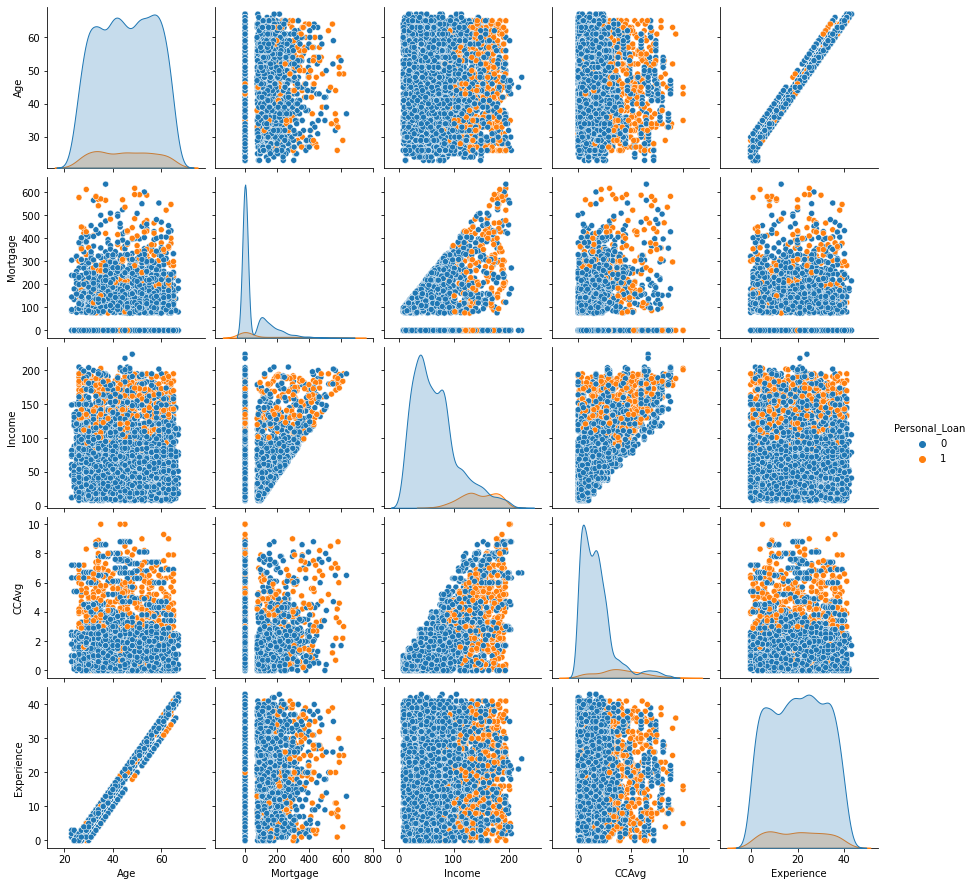

In [35]:
df_pair = df[['Age','Mortgage','Income','CCAvg','Experience','Personal_Loan']]
sns.pairplot(df_pair,hue='Personal_Loan')


####  Insights:

1. customers with `Age` above 20 yrs had personal loan in last campign.
2. Customer with higher `Mortgage` mainly accepted personal loan offered in last campign irres. Most of the customer were having mortgage higher tham  200 thousand dollars. 
3. Customers with higher `Income` (more than 200 thousand dollar) mainly accepted loan offered in last campaign.
4. Customer with higher `CCAvg` mainly haad accepted loans in past.
5. Customer with higher `Income` with any range of `Mortgage` had accepted loan in past so there is no linear relationship between mortgage and income.
6. There is no relation between `Age` and other variables in terms of accepting loans. So we can consider age as dependent variables.
7. There is also no linear relationship of `Mortgage` with `CCAvg` and `Experience`. 
8. There is no linear relatinoship of income with `CCAvg` and `Experience`.




### Plotting relationship of continuous variables with Personal_Loan

#### Strip plot

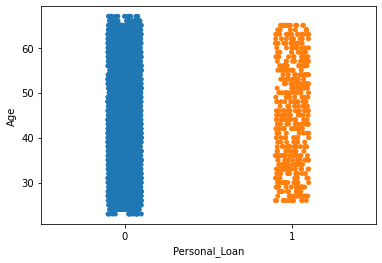

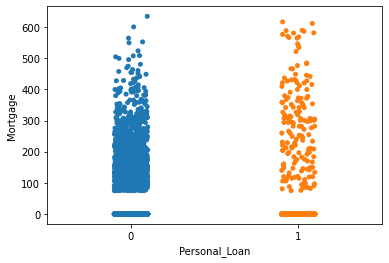

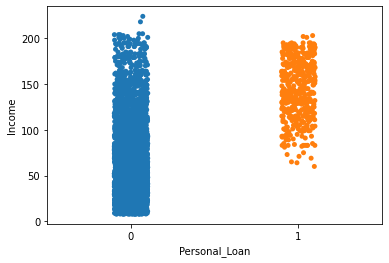

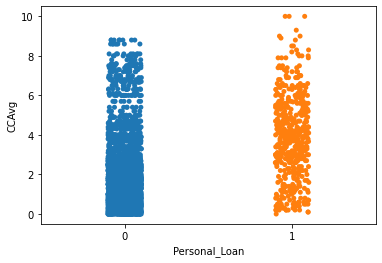

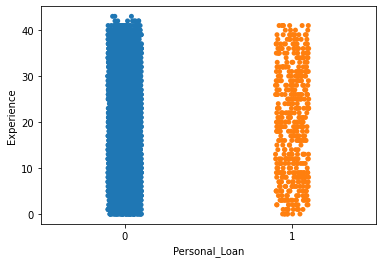

In [36]:
for col in df_pair:
    if col != 'Personal_Loan':
        sns.stripplot(df['Personal_Loan'],df[col]);
        plt.show()


#### Insights:
1. customer with higher incomes only accepted personal loans.
2. There are a few cases where customer got personal loan even they did not have any mortgage.
3. Only customers with age above 20 yrs accepted loans.

#### Plot relationship of categorical variables with Personal_Loan

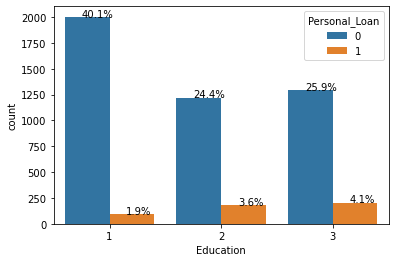

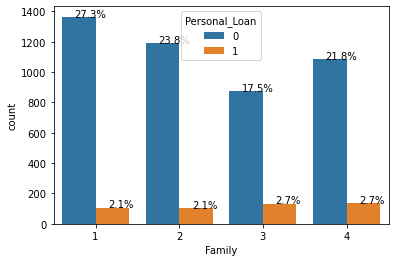

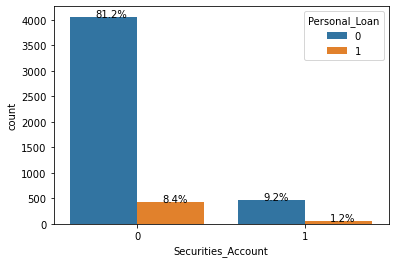

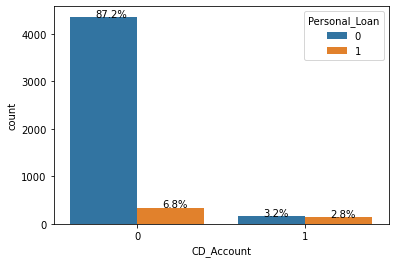

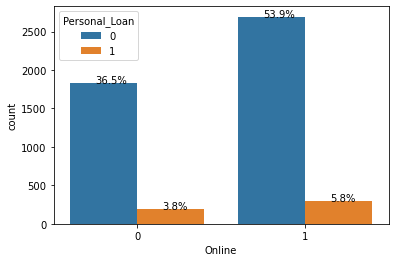

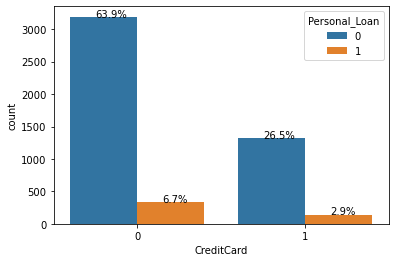

In [37]:
cat_variable = ['Education','Family','Securities_Account','CD_Account','Online','CreditCard']
for col in cat_variable:
    ax=sns.countplot(data=df,x = col, hue='Personal_Loan');
    #plt.show()
    for p in ax.patches:
        total = len(df[col])
        percentage = '{:.1f}%'.format(100* p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        
        ax.annotate(percentage,(x,y) , size=10)
    plt.show()
        

#### Insights:

1. More customers with no security accounts accepted personal loan in past campaign than customer with Security account.
2. More customers with no cretificate of deposite accepted personal loan in past campaign than customer with CD.
3. More customers with no credit card accepted personal loan in past campaign than customer with credit card.
4. 4.1 % of Customers are the ones who have advance education and accepted personal loan.  3.6% have grad and only 1.9% customer are the ones who haave only under grad and accepted personal loans.
5. There is not a significant impact of family size on nmber of customers who has personal loan. 2.7% customers have family size 3 and 4 and 2.1% customers have family size 1 and 2.
6. More customers with online banking had accepted loans in past campaign.

#### Category plot

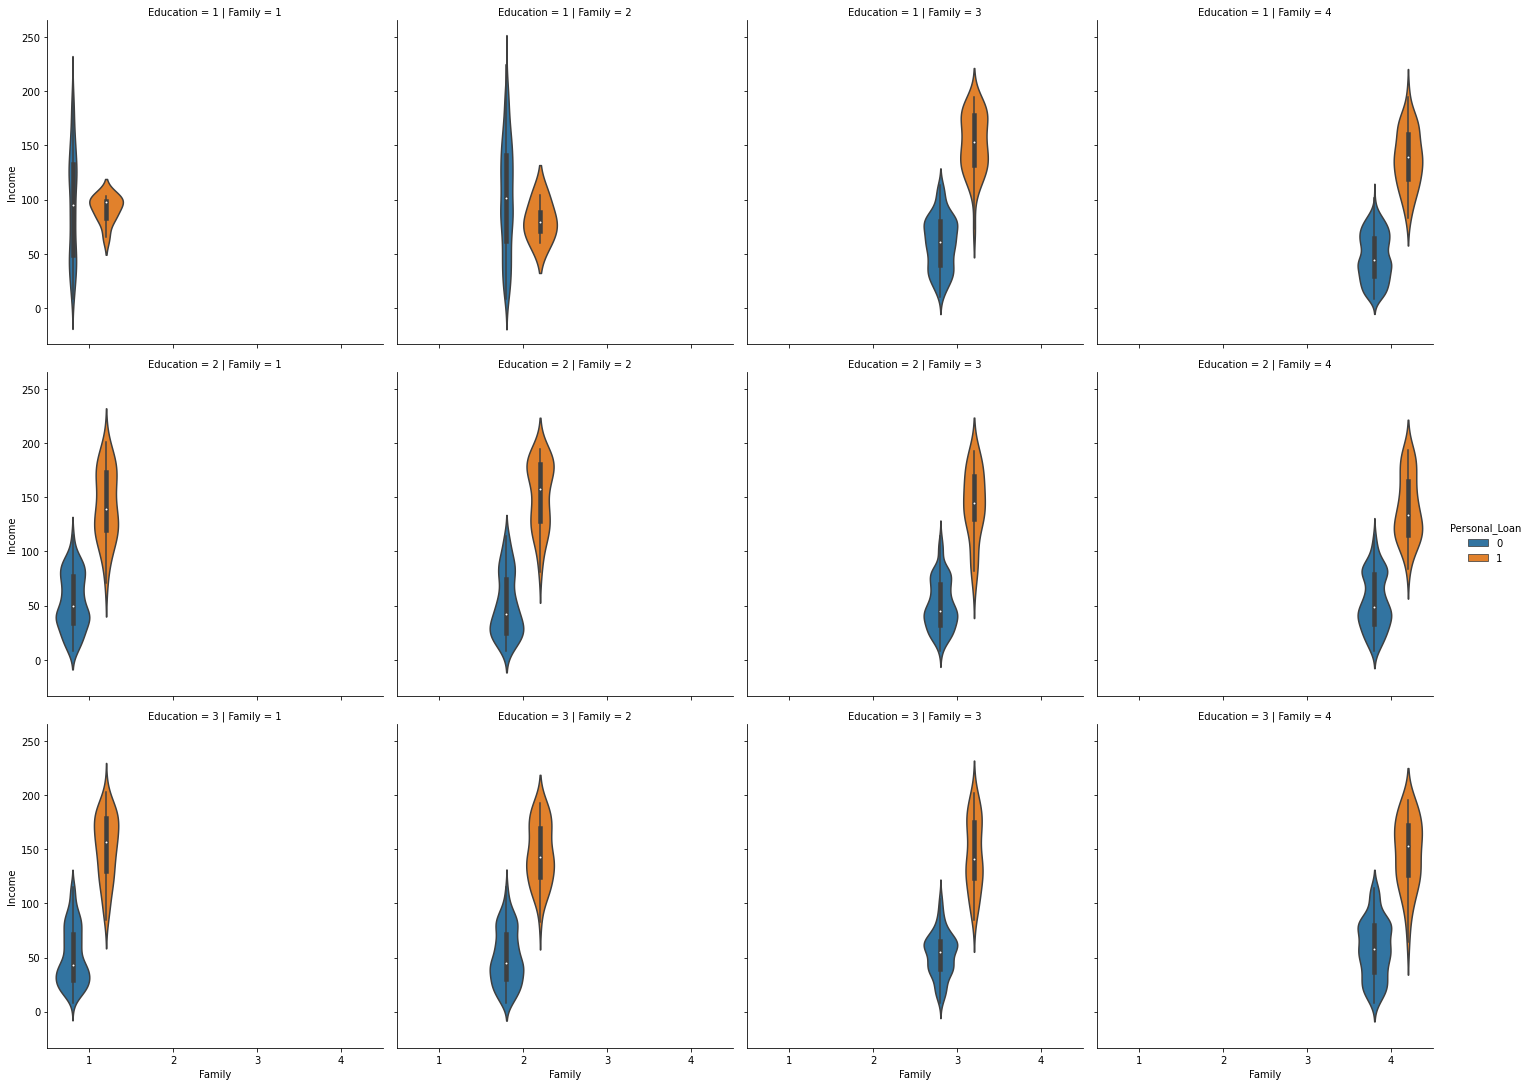

In [38]:
#Plot between education, personal_lean and income


sns.catplot(x ='Family', y = 'Income',row = 'Education',col = 'Family',hue='Personal_Loan',data = df, kind = 'violin');

#### Insights:

1. More Families with higher income accepted personal loan in past campaign. There is no significant impact of family size and education except the count for tundergrad customers with family size 1-2 who accepted loan in past is lesser than other family customer with bigger family size and grad and advannce education.

#### Heatmap

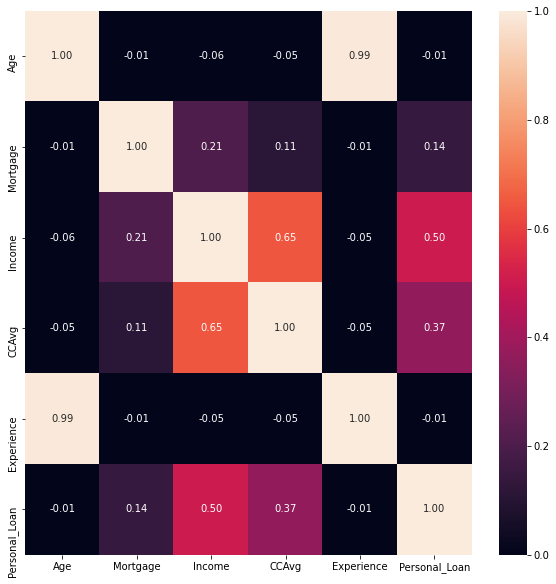

In [39]:
plt.figure(figsize=(10,10))

sns.heatmap(df_pair.corr(),vmin=0,vmax=1,fmt='.2f',annot=True)
plt.show()

#### Insights:

1. Co-relation between `Age` and `Exeprience` are almost 1 (.99) so we can drop one of them.
2. `Age` does not have any corelation to other variables so we can consider it as independent variable (if we are dropping experience).
3. `Mortgage` does not have strong co-relation to any other variable so can be considered as independent variable.
4. `Income` has 0.5 correlation with `Personal_Loan` which is good for our mode. IT also has good correlation `CCAvg` so we need to further analyze the impact.
5. `CCAvg` does not have significant correlation with other variables except `Income`.


## 4. Insights based on EDA

* Detailed insights are provided in previous step along with plots.

## 5. Data Pre-processing

### 5. 1. Missing value Treatment

In [40]:
df.isnull().sum().sort_values(ascending=False)


Area                  0
CreditCard            0
Online                0
CD_Account            0
Securities_Account    0
Personal_Loan         0
Mortgage              0
Education             0
CCAvg                 0
Family                0
ZIPCode               0
Income                0
Experience            0
Age                   0
ID                    0
dtype: int64

* There is no missing value in dataset.

### 5. 2. Outlier Treatment

### Treating exprience column as it has negative values, Income, CCAvg, mortgage
As per the data analysis income , CCAvg and mortgage have outliers and skewness which we need to treat.


#### checking zero values

In [41]:
df[df['Income'] == 0]['Income'].count()

0

In [42]:
df[df['Mortgage'] == 0]['Mortgage'].count()

3462

In [43]:
df[df['CCAvg'] == 0]['CCAvg'].count()

106

* Zero value is possible with income mortgage and CCAvg but we have to add const to value in order to do log transformation.
* We will transform all the 3 variables using lorarithmic transformation which will treat both skewness and outliers

#### Outlier treatment of Income, CCAvg and Mortgage column column ( Log Transformation)

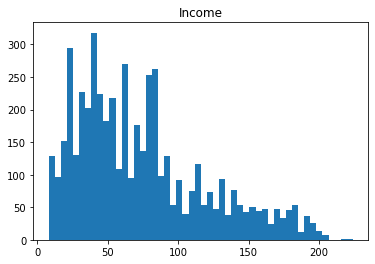

0


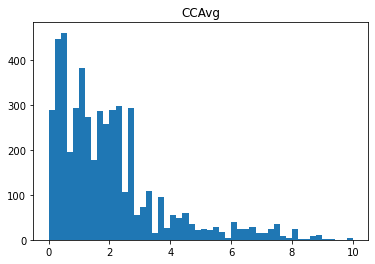

106


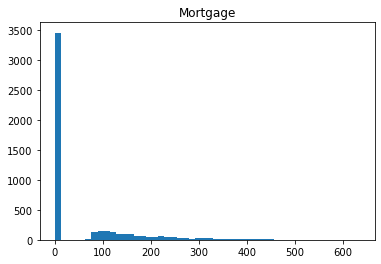

3462


In [44]:
#histplot for Income, CCAvg and Mortgage before log transformation
cols_to_log = ['Income','CCAvg','Mortgage']
for colname in cols_to_log:
    plt.hist(df[colname], bins=50)
    plt.title(colname)
    plt.show()
    print(np.sum(df[colname] <= 0))

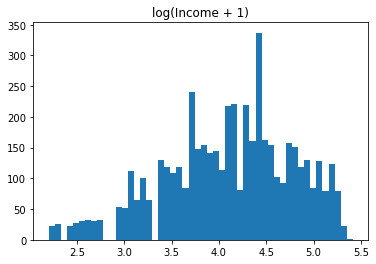

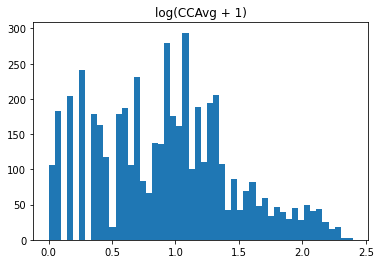

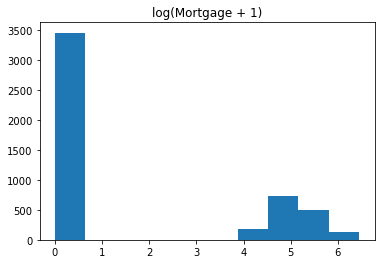

In [45]:
## Histplot after transformatyion
plt.hist(np.log(df['Income'] + 1), 50)
plt.title('log(Income + 1)')
plt.show()
plt.hist(np.log(df['CCAvg'] + 1), 50)
plt.title('log(CCAvg + 1)')
plt.show()
plt.hist(np.log(df['Mortgage'] + 1), 10)
plt.title('log(Mortgage + 1)')
plt.show()

In [46]:
cols = ['Income','CCAvg','Mortgage']
for colname in cols:
    df[colname + '_log'] = np.log(df[colname] + 1)
df.drop(cols, axis=1, inplace=True)

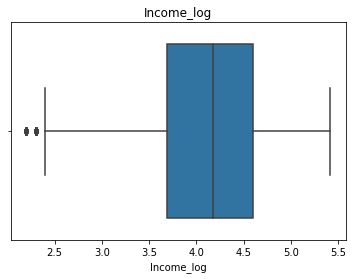

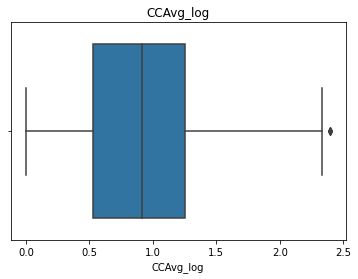

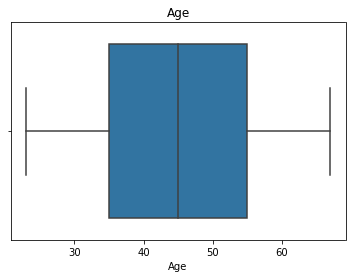

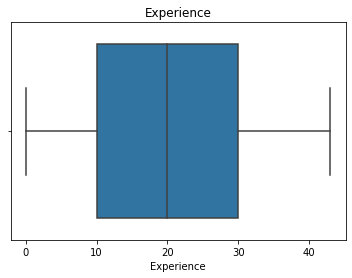

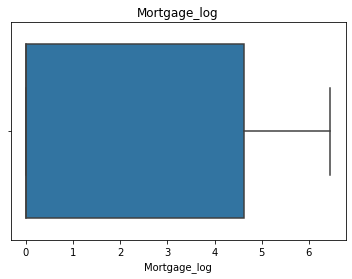

In [47]:
numerical_col = ['Income_log','CCAvg_log','Age','Experience','Mortgage_log']

for col in numerical_col:
    sns.boxplot(data=df,x=col);
    
    plt.title(col)          
    plt.show()

`Income_log` and `CCAvg_log` still have 1-2 outlier. We can treat them by replacing with quantile range

In [48]:
def treat_outliers(data,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    data: data frame
    col: name of the column
    '''
    Q1=data[col].quantile(0.25) # 25th quantile
    Q3=data[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    data[col] = np.clip(data[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return data


    

In [49]:
col_outlier = ['Income_log','CCAvg_log']
for c in col_outlier:
    df = treat_outliers(df,c)
        
    

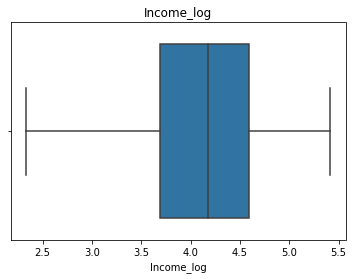

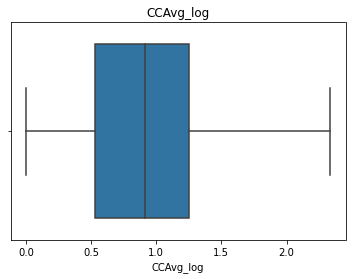

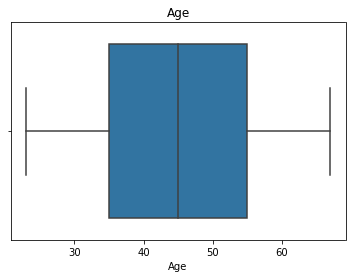

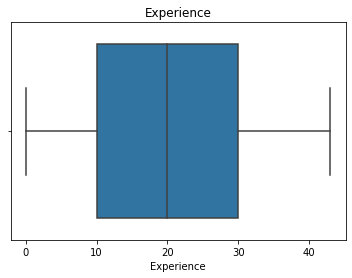

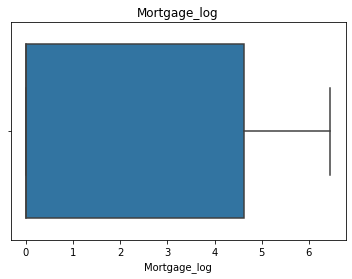

In [50]:
## verifying if all outliers are treated

numerical_col = ['Income_log','CCAvg_log','Age','Experience','Mortgage_log']

for col in numerical_col:
    sns.boxplot(data=df,x=col);
    
    plt.title(col)          
    plt.show()

### 5.3 Splitting Test and Training data

In [51]:
df.columns

Index(['ID', 'Age', 'Experience', 'ZIPCode', 'Family', 'Education',
       'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online',
       'CreditCard', 'Area', 'Income_log', 'CCAvg_log', 'Mortgage_log'],
      dtype='object')

In [52]:
##As per our data analysis, Experience nad Age are ocmpletely corelated so dropping one of them 


X = df.drop(['ID','Personal_Loan','ZIPCode'], axis=1)
Y = df['Personal_Loan']

#Splitting data in train and test sets
X_train,X_test,y_train,y_test=train_test_split(X, Y, test_size=0.3, random_state=1,stratify=Y)

In [53]:
y_train.shape

(3500,)

In [54]:
y_test.shape

(1500,)

## 6. Model Building - Logistic Regression

### Building Model

Model can make wrong predictions as:¶

1. Predicting a person will accept personal loan but actually will not.
2. Predicting a person will not accept personal loan but actually will accept.

### Which case is more important? 
* Both the cases are important as:
a) If we predict a person will accept personal load but actually will not.
b) If we predict a person will not accept personal load but actually will accept loan. 



In [55]:
def get_metrics_score(model, X_train,X_test,y_train,y_test,flag=True):

    score_list=[]
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_acc=accuracy_score(y_train,pred_train)
    test_acc=accuracy_score(y_test,pred_test)
    
    train_recall=metrics.recall_score(y_train,pred_train)
    test_recall=metrics.recall_score(y_test,pred_test)
    
    
    train_precision = precision_score(y_train,pred_train)
    test_precision = precision_score(y_test,pred_test)
    
    train_f1 = f1_score(y_train,pred_train)
    test_f1 = f1_score(y_test,pred_test)
    
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
        
     # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",train_acc)
        print("Accuracy on test set : ",test_acc)
        print("Recall on training set : ",train_recall)
        print("Recall on test set : ",test_recall)
        print("Precision on training set : ",train_precision)
        print("Precision on test set : ",test_precision)
        print("F1 on training set : ",train_f1)
        print("F1 on test set : ",test_f1)
    
    return score_list
    

In [56]:
def make_confusion_matrix(model,test_X, test_y,labels=[1,0]):
    
    y_pred = model.predict(test_X)
    cm=metrics.confusion_matrix(test_y,y_pred,labels=[1,0])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - Accepted -loan","Actual - Not Accepted Loan"]],
                  columns = [i for i in ['Predicted - Accepted -loan','Predicted - Not Accepted Loan']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    

### 6.1 Test Assumptions of Logistic regression

1. The Response Variable is Binary.
2. The Observations are Independent.
3. There is No Multicollinearity Among Explanatory Variables.
4. There are No Extreme Outliers.
5. The Sample Size is Sufficiently Large.


#### Test Assumption: 1 and 2 : binary response and independent observations.

As per EDA in previous step,
* we have identified that response variable 'Personal_loan' is binary.
* observation is independent.

#### Test Assumptions 4 and 5:

* Sample size is sufficientely large (5000 records).
* We have already treated outliers in previous step.

#### TEst Assumption 3. Multicollinearity- Check Variance Inflation factor to choose important features

In [57]:
#dataframe with numerical column only
num_feature_set = X.copy()
num_feature_set = add_constant(num_feature_set)
num_feature_set = num_feature_set.astype(float)

In [58]:
vif_series1 = pd.Series([variance_inflation_factor(num_feature_set.values, i) for i in range(num_feature_set.shape[1])],index=num_feature_set.columns,dtype = float)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

const                 3301.286050
Age                     89.469271
Experience              89.384690
Family                   1.024203
Education                1.099163
Securities_Account       1.134131
CD_Account               1.308270
Online                   1.039858
CreditCard               1.106443
Area                     1.004413
Income_log               1.608868
CCAvg_log                1.562026
Mortgage_log             1.004366
dtype: float64



Age and Experience has VIF 89. We already know from EDA that Age and Experience are highly related and have correlation value .99 so we can consider to drop one of them.

In [59]:
# droping variables of perfect collinearity
num_feature_set = num_feature_set.drop('Experience',axis=1)

In [60]:
vif_series1 = pd.Series([variance_inflation_factor(num_feature_set.values,i) for i in range(num_feature_set.shape[1])],index=num_feature_set.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

const                 2911.373877
Age                      1.009492
Family                   1.022850
Education                1.034169
Securities_Account       1.133912
CD_Account               1.307508
Online                   1.039832
CreditCard               1.106442
Area                     1.004382
Income_log               1.606716
CCAvg_log                1.557569
Mortgage_log             1.004363
dtype: float64



Now that there's no multicollinearity in the data, let's build a logistic model, check it's performance and use the output to interpret the results.

In [61]:
X_train, X_test, y_train, y_test = train_test_split(num_feature_set, Y, test_size=0.30, random_state = 1)

### 6.2 Building Logistic Regrerssion model

In [62]:
model=LogisticRegression(random_state=None)
lg=model.fit(X_train,y_train)


## 7. Evaluate Model Performance and improvement

### 7.1 Evaluating Model Performance

Accuracy on training set :  0.9485714285714286
Accuracy on test set :  0.942
Recall on training set :  0.5619335347432024
Recall on test set :  0.5234899328859061
Precision on training set :  0.8416289592760181
Precision on test set :  0.8297872340425532
F1 on training set :  0.6739130434782608
F1 on test set :  0.6419753086419753


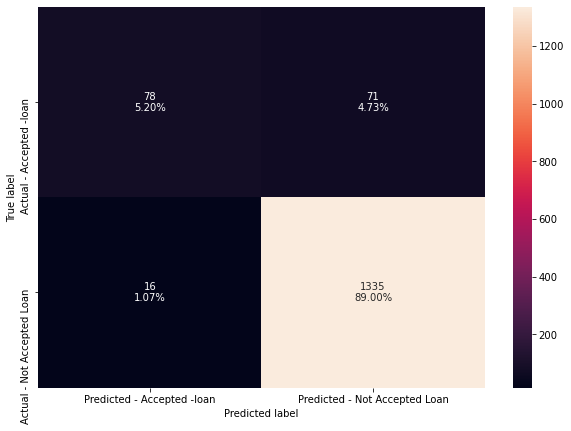

In [63]:
scores_LR = get_metrics_score(lg,X_train,X_test,y_train,y_test,flag=True)

# creating confusion matrix
make_confusion_matrix(lg,X_test,y_test)

#### Insights
1. As per the confusion matrix, our model has predicted 89% True negatives , 5.20% true positive, 1.07% False positive and 4.73%false negative.
2. Recall score is only .52% and f1 score on test data is only 64.1% which we can try to improve.


#### ROC-AUC on training data

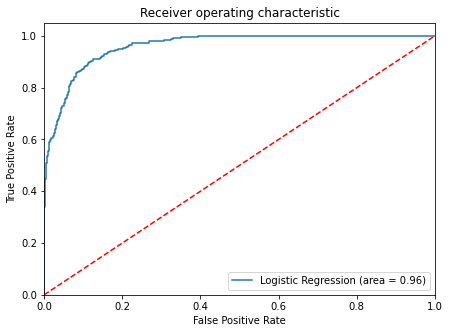

In [64]:
logit_roc_auc_train = roc_auc_score(y_train, lg.predict_proba(X_train)[:,1])
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:,1])
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#### ROC-AUC on test data

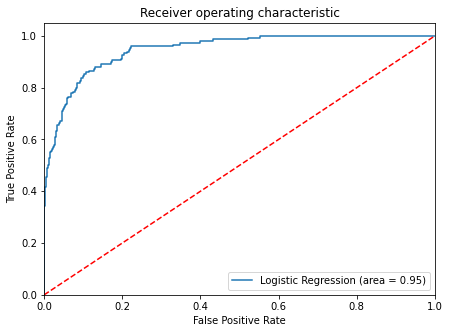

In [65]:
logit_roc_auc_test = roc_auc_score(y_test, lg.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, lg.predict_proba(X_test)[:,1])
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#### Insights
* Logistic Regression model is giving a generalized performance on training and test set. We can still try to do improvement in model as f1 score is  around 65 which can be improved.

In [66]:
log_odds = lg.coef_[0]
pd.DataFrame(log_odds, X_train.columns, columns=['coef']).T

,const,Age,Family,Education,Securities_Account,CD_Account,Online,CreditCard,Area,Income_log,CCAvg_log,Mortgage_log
coef,-0.046505,0.001292,0.220251,1.433371,-0.068171,1.662043,-0.25915,-0.27932,-0.028589,4.165354,1.524134,-0.011207


### 7.2 Model Performance Improvement

We can try to improve model by setting identifying optimal threshold.

#### Threshold using ROC Curve:

We can try to improve model by setting identifying optimal threshold. while setting threshold using ROC curve, optimal threshold would be where where trp is high and frp is low.

In [67]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = metrics.roc_curve(y_test, lg.predict_proba(X_test)[:,1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(optimal_threshold)

0.12509744449168558


In [68]:
# Model prediction with optimal threshold

pred_train_opt = (lg.predict_proba(X_train)[:,1]>optimal_threshold)
pred_test_opt = (lg.predict_proba(X_test)[:,1]>optimal_threshold)

print('Accuracy on train data:',accuracy_score(y_train, pred_train_opt) )
print('Accuracy on test data:',accuracy_score(y_test, pred_test_opt))

print('Recall on train data:',recall_score(y_train, pred_train_opt) )
print('Recall on test data:',recall_score(y_test, pred_test_opt))

print('Precision on train data:',precision_score(y_train, pred_train_opt) )
print('Precision on test data:',precision_score(y_test, pred_test_opt))

print('F1 Score on train data:',f1_score(y_train, pred_train_opt) )
print('F1 Score on test data:',f1_score(y_test, pred_test_opt))

print('ROC-AUC Score on train data:',roc_auc_score(y_train, pred_train_opt) )
print('ROC-AUC Score on test data:',roc_auc_score(y_test, pred_test_opt))

Accuracy on train data: 0.89
Accuracy on test data: 0.8886666666666667
Recall on train data: 0.8882175226586103
Recall on test data: 0.8523489932885906
Precision on train data: 0.45794392523364486
Precision on test data: 0.46691176470588236
F1 Score on train data: 0.6043165467625898
F1 Score on test data: 0.6033254156769596
ROC-AUC Score on train data: 0.8892018506319243
ROC-AUC Score on test data: 0.8725105440166121


#### Insights

* There is significant change in the metrics scores. Accuracy and ROC-AUC has been decreased but recall has been increased while precision has been decreased.

#### Threshold using Precision-Recall curve

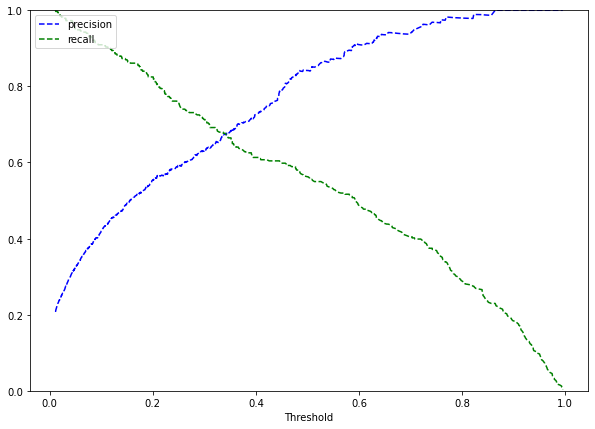

In [69]:
y_scores=lg.predict_proba(X_train)[:,1]
prec, rec, tre = precision_recall_curve(y_train, y_scores,)

def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0,1])
plt.figure(figsize=(10,7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At .34 , we can get higher recall andgood precision value.

In [70]:
optimal_threshold = 0.34

# Model prediction with optimal threshold
pred_train_opt = (lg.predict_proba(X_train)[:,1]>optimal_threshold)
pred_test_opt = (lg.predict_proba(X_test)[:,1]>optimal_threshold)

#Model performance with optimal threhold

print('Accuracy on train data:',accuracy_score(y_train, pred_train_opt) )
print('Accuracy on test data:',accuracy_score(y_test, pred_test_opt))

print('Recall on train data:',recall_score(y_train, pred_train_opt))
print('Recall on test data:',recall_score(y_test, pred_test_opt))

print('Precision on train data:',precision_score(y_train, pred_train_opt) )
print('Precision on test data:',precision_score(y_test, pred_test_opt))

print('F1 Score on train data:',f1_score(y_train, pred_train_opt) )
print('F1 Score on test data:',f1_score(y_test, pred_test_opt))

print('ROC-AUC Score on train data:',roc_auc_score(y_train, pred_train_opt) )
print('ROC-AUC Score on test data:',roc_auc_score(y_test, pred_test_opt))

Accuracy on train data: 0.9385714285714286
Accuracy on test data: 0.9346666666666666
Recall on train data: 0.676737160120846
Recall on test data: 0.610738255033557
Precision on train data: 0.6746987951807228
Precision on test data: 0.6946564885496184
F1 Score on train data: 0.6757164404223227
F1 Score on test data: 0.65
ROC-AUC Score on train data: 0.8213285043267531
ROC-AUC Score on test data: 0.7905652785160383


#### Insights
* Model is performing well on training and test set and we can consider it as our final model. 
* Recall has reduced and precision has improved by changing the optimal threshold to 0.34 which in turn has improved the F1 score from .60 to .65.


In [71]:
pred_train_opt

array([False, False, False, ..., False, False, False])

### 7.3 Finding cofficients

In [72]:
log_odds = lg.coef_[0]
pd.DataFrame(log_odds, X_train.columns, columns=['coef']).T

,const,Age,Family,Education,Securities_Account,CD_Account,Online,CreditCard,Area,Income_log,CCAvg_log,Mortgage_log
coef,-0.046505,0.001292,0.220251,1.433371,-0.068171,1.662043,-0.25915,-0.27932,-0.028589,4.165354,1.524134,-0.011207


#### Cofficient's Interpretation

* `Income` has highest positive contribution in final model. 1 unit change in Income will change the odds of person accepting personal by 4.16%.
* `CD_Account` has second highest positive cofficient. Odds of people having CD_Accounts accepting personal loan is 1.66% lessthan people not haivng CD_accounts.
* 1 unit change in `CCAvg_log` will change odds of person accepting loans by 1.524134%.
* `Education` has positive cofficient and as per EDA, no of Persons with advance education accepted loans is more than no. of persons  with graduation which is higher than no. of person with undergrad. So Odds of accepting loans for people having advance education is 1.43% more than people having gradduation and odds of accepting loans for people people having grad is 1.43% more than people having undergrad.
* `Family` has positive cofficient and as per EDA, with increase size of family, possibility of accepting loans increases. So odds of person accepting loan change .22% with increase in family size.
* 1 unit change in `Age` will change odds of people accepting loan by 0.0012%.
* `Securities_Account` has negative cofficient and as per EDA, more people with no Security accounts accpeted loan in past. odds of accepting loans for people not having  security accounts is more by 0.068%.
* `Online`  has negative cofficient and as per EDA, more people with online accounts accpeted loan in past. odds of accepting loans for people having  online accounts is lesser by 0.25%.
* `CreditCard` has negative cofficient and as per EDA, more people with no creditcard accpeted loan in past. odds of accepting loans for people not having  credit card id more than people having credit card by 0.25%.
* `Mortgage_log` has negative cofficient. 1 unit change in Income will change the odds of person accepting personal loan by .011%.

## 8. Model Building - Decision Tree




In this case, we can pass a dictionary {0:0.15,1:0.85} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

class_weight is a hyperparameter for the decision tree classifier.

### 8.1 Splitting test and training sample

In [73]:
#Splitting data in train and test sets
X_train,X_test,y_train,y_test=train_test_split(X, Y, test_size=0.3, random_state=1,stratify=Y)

### 8.2 Building Decision Tree Model

In [74]:
tree_model = DecisionTreeClassifier(criterion='gini',random_state=1)

In [75]:
tree_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

## 9. Model Performance evaluation and improvement

### 9.1 Model Performance evaluation

In [76]:
###Method for creating confusion matrix
def make_confusion_matrix(model,y_actual,X_test,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

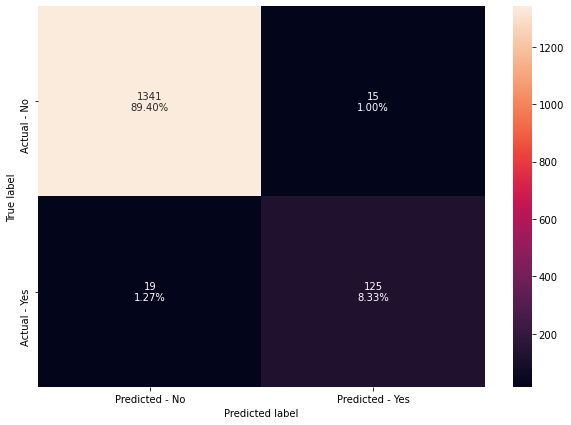

In [77]:
make_confusion_matrix(tree_model,y_test,X_test)

In [78]:
y_train.value_counts()

0    3164
1     336
Name: Personal_Loan, dtype: int64

#### Insights
* We only have 9.6% of positive classes, so if our model marks each sample as negative, then also we'll get 90% accuracy, hence accuracy is not a good metric to evaluate here.

In [79]:
## MEthod for printing metrics
def get_tree_metrics_score(tree_model, X_train,X_test,y_train,y_test,flag=True):

    score_list=[]
    pred_train = tree_model.predict(X_train)
    pred_test = tree_model.predict(X_test)
    
    train_acc=accuracy_score(y_train,pred_train)
    test_acc=accuracy_score(y_test,pred_test)
    
    train_recall=metrics.recall_score(y_train,pred_train)
    test_recall=metrics.recall_score(y_test,pred_test)
    
    
    train_precision = precision_score(y_train,pred_train)
    test_precision = precision_score(y_test,pred_test)
    
    train_f1 = f1_score(y_train,pred_train)
    test_f1 = f1_score(y_test,pred_test)
    
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
        
     # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",train_acc)
        print("Accuracy on test set : ",test_acc)
        print("Recall on training set : ",train_recall)
        print("Recall on test set : ",test_recall)
        print("Precision on training set : ",train_precision)
        print("Precision on test set : ",test_precision)
        print("F1 on training set : ",train_f1)
        print("F1 on test set : ",test_f1)
    
    return score_list
    

In [80]:
get_tree_metrics_score(tree_model, X_train,X_test,y_train, y_test,flag=True)

Accuracy on training set :  1.0
Accuracy on test set :  0.9773333333333334
Recall on training set :  1.0
Recall on test set :  0.8680555555555556
Precision on training set :  1.0
Precision on test set :  0.8928571428571429
F1 on training set :  1.0
F1 on test set :  0.8802816901408451


[1.0,
 0.9773333333333334,
 1.0,
 0.8680555555555556,
 1.0,
 0.8928571428571429,
 1.0,
 0.8802816901408451]

#### Insights:

* There is a disparity in performance of model on training set and test set, which suggests that the model is overfiiting.

#### Visualizing our tree

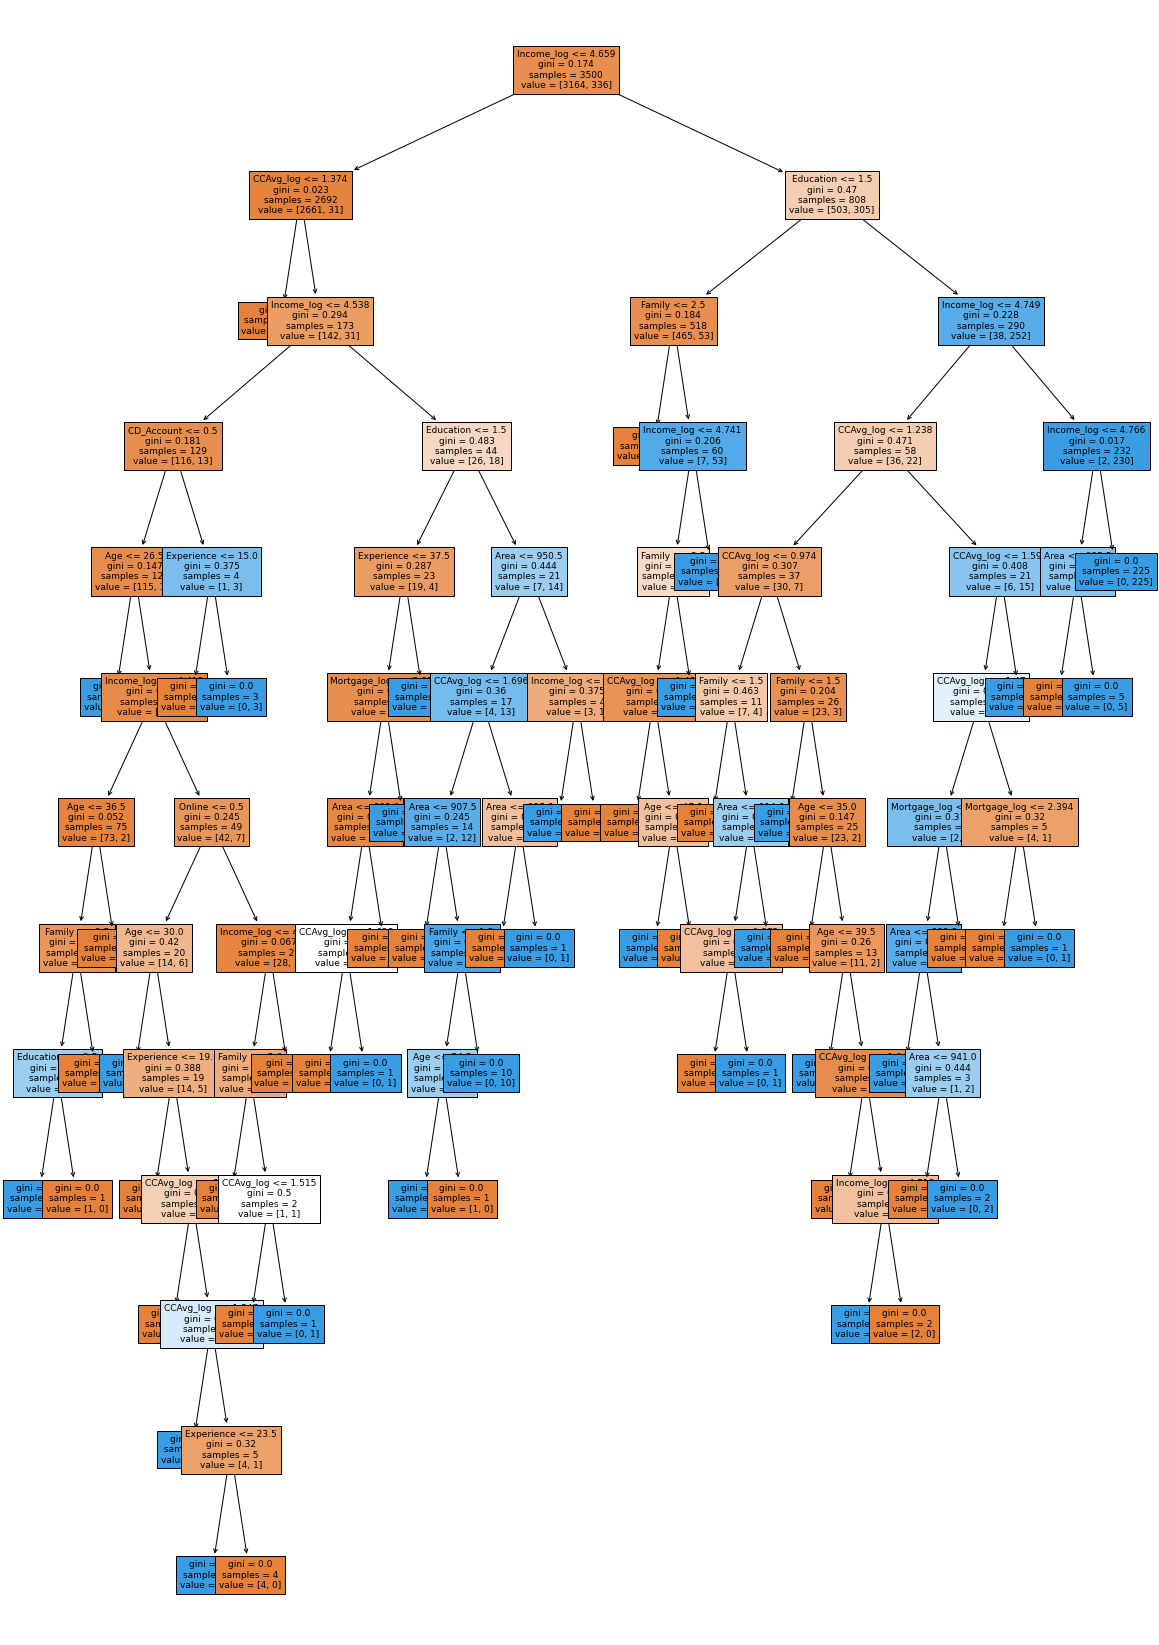

In [81]:
feature_names = X.columns
plt.figure(figsize=(20,30))
out = tree.plot_tree(tree_model,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None,)
#below code will add arrows to the decision tree split if they are missing
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

#### Checking Feature importance

In [82]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
importances = tree_model.feature_importances_
print (pd.DataFrame(importances, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                         Imp
Education           0.370721
Income_log          0.360783
Family              0.154787
CCAvg_log           0.054103
Area                0.018825
Age                 0.012702
Experience          0.012024
Mortgage_log        0.007580
CD_Account          0.005728
Online              0.002747
Securities_Account  0.000000
CreditCard          0.000000


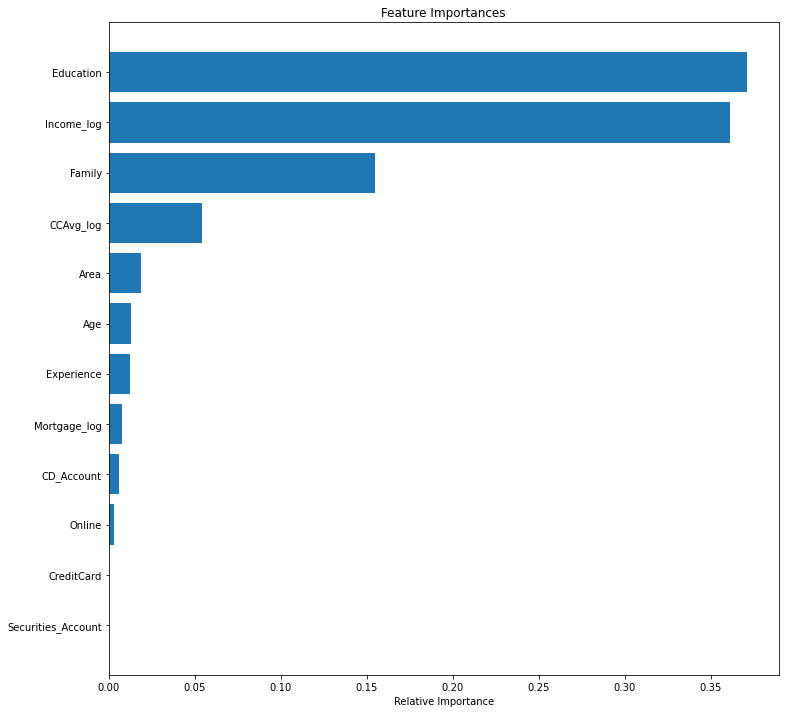

In [83]:

indices = np.argsort(importances)
feature_names = X.columns
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* According to our initial model, education is the  most important features of our model. But our tree is too complex.

### 9.2 Model Performance Improvement - Reducing overfitting in the model

#### 1. Gridsearch for hyper parameter tunning of our model -preprunning

In [84]:
from sklearn.model_selection import GridSearchCV

In [85]:
estimator = DecisionTreeClassifier(random_state=1,class_weight={0:0.904,1:0.096},)

# Grid of parameters to choose from

parameters = {'max_depth': np.arange(1,10),
            'criterion': ['entropy','gini'],
            'splitter': ['best','random'],
            'min_impurity_decrease': [0.00001,0.0001],
            'max_features': ['log2','sqrt']
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)
grid_obj=GridSearchCV(estimator,parameters,scorer,cv=10)
grid_obj=grid_obj.fit(X_train,y_train)

estimator=grid_obj.best_estimator_

#fitting best estimator to data
estimator.fit(X_train,y_train)

DecisionTreeClassifier(class_weight={0: 0.904, 1: 0.096}, criterion='entropy',
                       max_depth=9, max_features='log2',
                       min_impurity_decrease=1e-05, random_state=1)

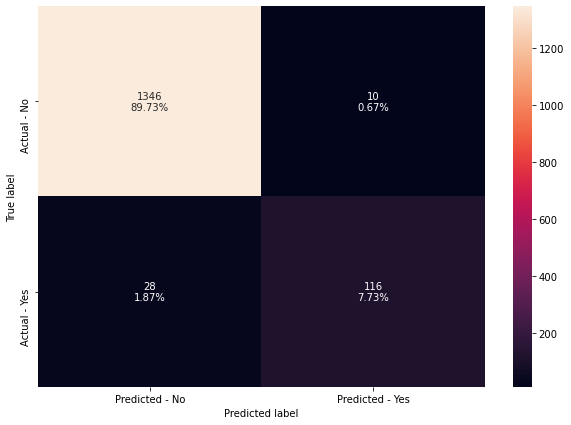

In [86]:
make_confusion_matrix(estimator,y_test,X_test)

#### Insights:

* TP: 7.73%
* FP : .67%
* TN : 89.73%
* FN: 1.87%

In [87]:
get_tree_metrics_score(estimator, X_train,X_test,y_train, y_test,flag=True)

Accuracy on training set :  0.9911428571428571
Accuracy on test set :  0.9746666666666667
Recall on training set :  0.9077380952380952
Recall on test set :  0.8055555555555556
Precision on training set :  1.0
Precision on test set :  0.9206349206349206
F1 on training set :  0.9516380655226209
F1 on test set :  0.8592592592592592


[0.9911428571428571,
 0.9746666666666667,
 0.9077380952380952,
 0.8055555555555556,
 1.0,
 0.9206349206349206,
 0.9516380655226209,
 0.8592592592592592]

#### Insights:

Our model performace's metrics are looking really good with both train and test data. Although F1 ,recall and precision are almost .1% lesser for testdata than train data. but all in all it is a good number. We can still try to do cost complexity prunning to see if we can get better result.

#### Visualize the tree

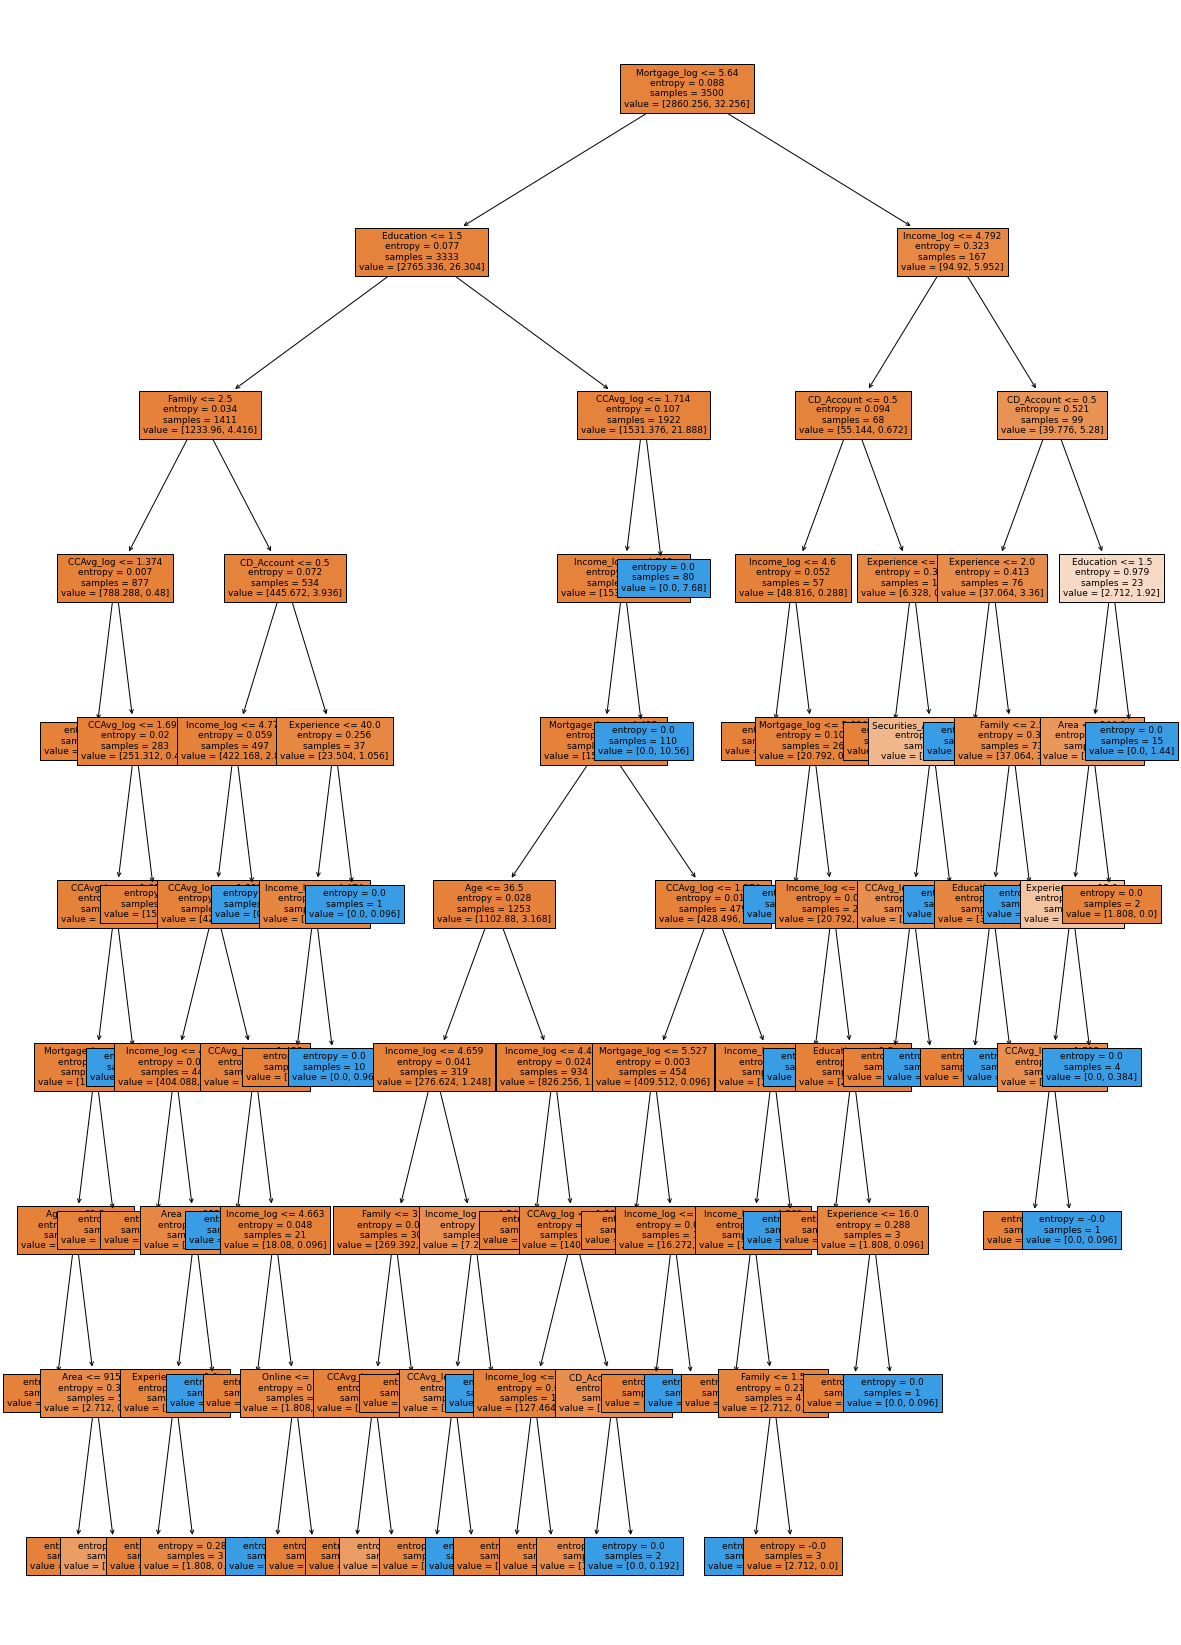

In [88]:
plt.figure(figsize=(20,30))
out = tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None,)
#below code will add arrows to the decision tree split if they are missing
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

#### Checking Feature importance

In [89]:
print (pd.DataFrame(estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))



                         Imp
Income_log          0.521936
CCAvg_log           0.259857
Education           0.074801
Family              0.050246
Mortgage_log        0.040364
CD_Account          0.020389
Experience          0.016543
Area                0.005858
Age                 0.004889
Securities_Account  0.002825
Online              0.002293
CreditCard          0.000000


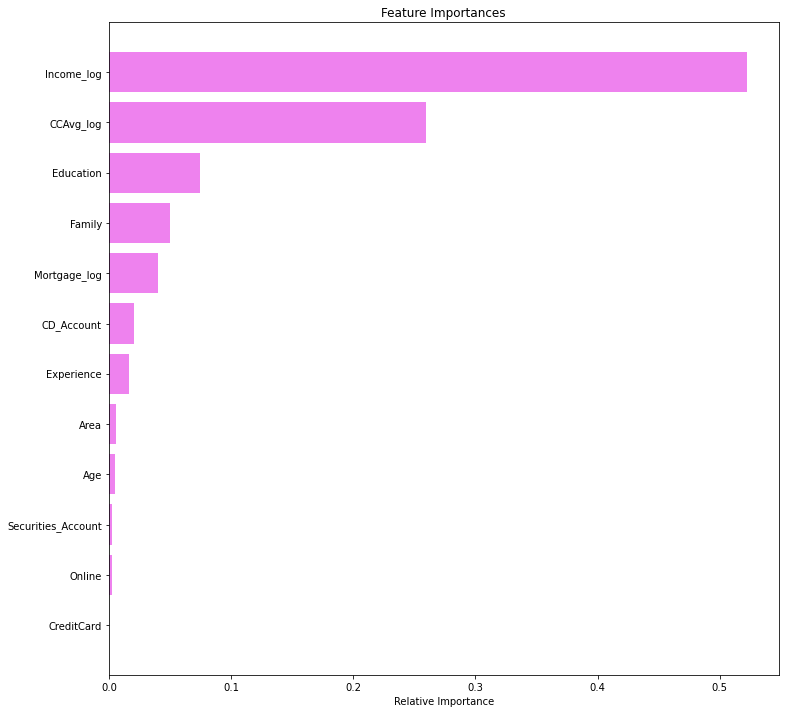

In [90]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Insights:

As per the feature importance plot, Income is the most importance feature.

#### 2. Cost Complexity Pruning - post Prunning

In [91]:
clf = DecisionTreeClassifier(random_state=1,class_weight = {0:0.904,1:0.096})
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [92]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,-3.789136e-18
1,3.684735e-20,-3.752289e-18
2,3.684735e-20,-3.715441e-18
3,3.684735e-20,-3.678594e-18
4,1.105421e-19,-3.568052e-18
5,1.105421e-19,-3.457510e-18
6,1.105421e-19,-3.346968e-18
7,3.095178e-19,-3.037450e-18
8,3.611041e-19,-2.676346e-18
9,4.922806e-18,2.246460e-18


#### Plotting total impurity versus effective alpha

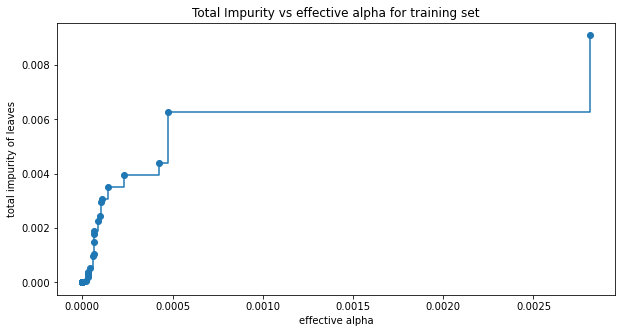

In [93]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [94]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha,class_weight = {0:0.904,1:0.096})
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.006479759343669135


#### Plotting number of nodes versus alpha and depth versus alpha

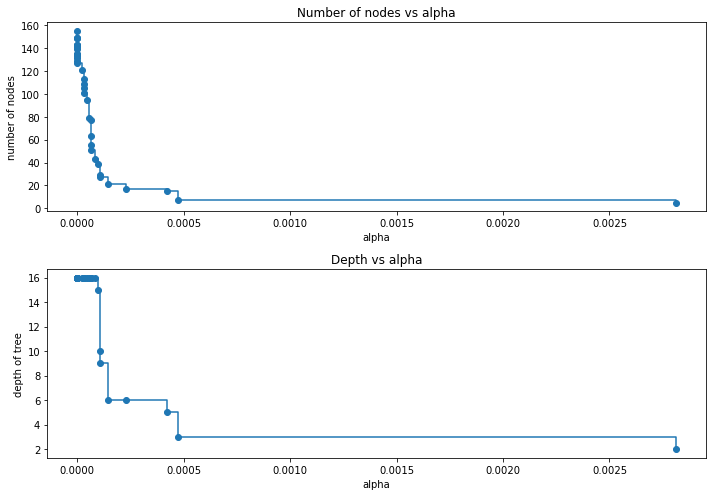

In [95]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

 #### Plotting between recall and alpha

In [96]:
recall_train=[]
for clf in clfs:
    pred_train3=clf.predict(X_train)
    values_train=metrics.recall_score(y_train,pred_train3)
    recall_train.append(values_train)

In [97]:
recall_test=[]
for clf in clfs:
    pred_test3=clf.predict(X_test)
    values_test=metrics.recall_score(y_test,pred_test3)
    recall_test.append(values_test)

In [98]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

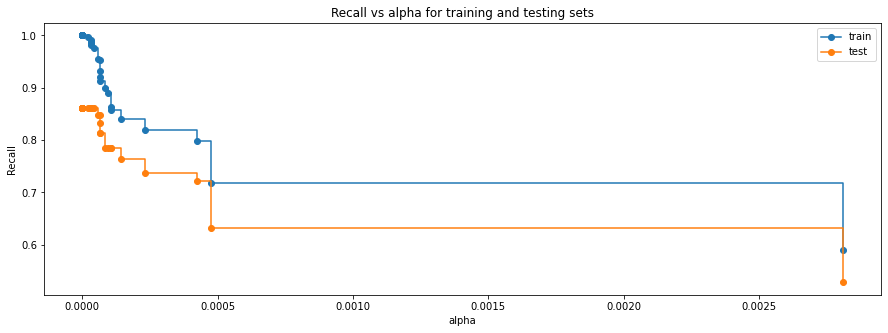

In [99]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post",)
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

#### Insights
* Maximum value of Recall when recall for test and test areclose, is at 0.0001 alpha, if we choose decision tree will have deplth aroung 10 and node around 60. LEts try when recall 

In [100]:
# creating the model where recall is max
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(class_weight={0: 0.904, 1: 0.096}, random_state=1)


In [101]:
best_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.904, 1: 0.096}, random_state=1)

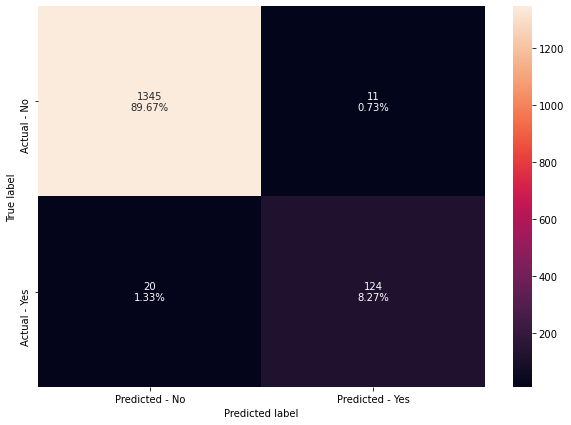

In [102]:
make_confusion_matrix(best_model,y_test,X_test)

In [103]:
get_tree_metrics_score(best_model, X_train,X_test,y_train, y_test,flag=True)

Accuracy on training set :  1.0
Accuracy on test set :  0.9793333333333333
Recall on training set :  1.0
Recall on test set :  0.8611111111111112
Precision on training set :  1.0
Precision on test set :  0.9185185185185185
F1 on training set :  1.0
F1 on test set :  0.8888888888888888


[1.0,
 0.9793333333333333,
 1.0,
 0.8611111111111112,
 1.0,
 0.9185185185185185,
 1.0,
 0.8888888888888888]

In [104]:
recall_test

[0.8611111111111112,
 0.8611111111111112,
 0.8611111111111112,
 0.8611111111111112,
 0.8611111111111112,
 0.8611111111111112,
 0.8611111111111112,
 0.8611111111111112,
 0.8611111111111112,
 0.8611111111111112,
 0.8611111111111112,
 0.8611111111111112,
 0.8611111111111112,
 0.8611111111111112,
 0.8611111111111112,
 0.8611111111111112,
 0.8611111111111112,
 0.8611111111111112,
 0.8611111111111112,
 0.8611111111111112,
 0.8611111111111112,
 0.8472222222222222,
 0.8472222222222222,
 0.8333333333333334,
 0.8125,
 0.8125,
 0.7847222222222222,
 0.7847222222222222,
 0.7847222222222222,
 0.7847222222222222,
 0.7638888888888888,
 0.7361111111111112,
 0.7222222222222222,
 0.6319444444444444,
 0.5277777777777778]

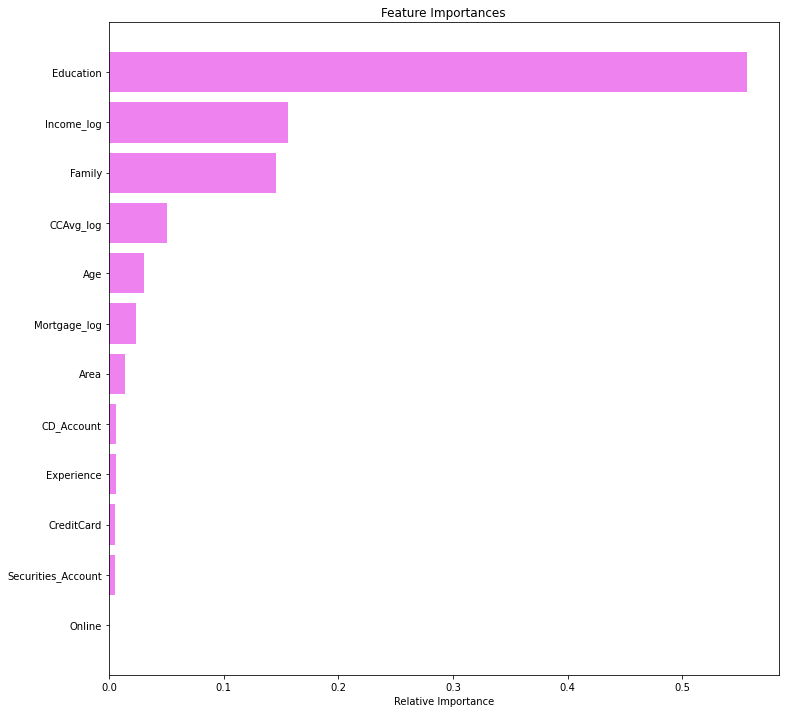

In [105]:

##Feature importance with this model
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

 #### Plotting between precision and alpha

In [106]:
precision_train=[]
for clf in clfs:
    pred_train3=clf.predict(X_train)
    values_train=metrics.precision_score(y_train,pred_train3)
    precision_train.append(values_train)

In [107]:
precision_test=[]
for clf in clfs:
    pred_test3=clf.predict(X_test)
    values_test=metrics.precision_score(y_test,pred_test3)
    precision_test.append(values_test)

In [108]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

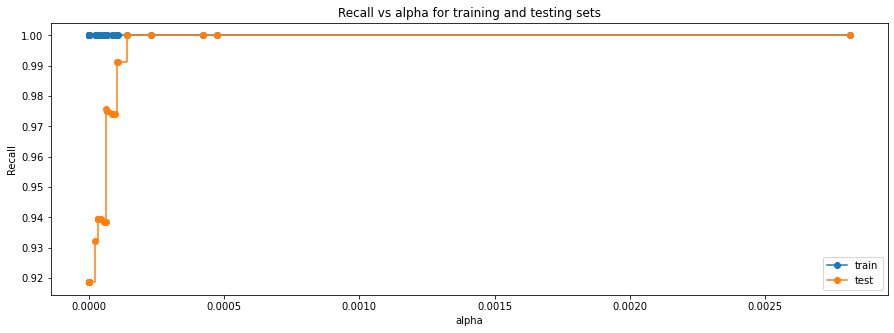

In [109]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, precision_train, marker='o', label="train",
        drawstyle="steps-post",)
ax.plot(ccp_alphas, precision_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

* Maximum value of Recall when recall for test and test are close is 1 and at 0.0001 alpha, if we choose decision tree will have deplth aroung 10 and node around 60. 

#### Insights :
 Model was performing better with pre-prunning(hyper parameter tunning). While using hyper parameters to improve model performance. AS the metrics for train and test data  was closer than the metrics after post prunning.  It seems that the model created after post prunning capturing more impurities than one build by hyper parameter tunning.

* Metrics after hyper parameter tunning:
 1. Accuracy on training set :  0.9911428571428571
 2. Accuracy on test set :  0.9746666666666667
 3. Recall on training set :  0.9077380952380952
 4. Recall on test set :  0.8055555555555556
 5. Precision on training set :  1.0
 6. Precision on test set :  0.9206349206349206
 7. F1 on training set :  0.9516380655226209
 8. F1 on test set :  0.8592592592592592
 
 * Metrics after post prunning:
 
 1. Accuracy on training set :  1.0
 2. Accuracy on test set :  0.9793333333333333
 3. Recall on training set :  1.0
 4. Recall on test set :  0.8611111111111112
 5. Precision on training set :  1.0
 6. Precision on test set :  0.9185185185185185
 7. F1 on training set :  1.0
 8. F1 on test set :  0.8888888888888888


So as final model, we can choose the one, we got after hyper parameter tunning.
 

### 9.3 Final Model

So as final model, we can choose the one, we got after hyper parameter tunning.

#### Feature importance for final model

In [110]:
print (pd.DataFrame(estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))


                         Imp
Income_log          0.521936
CCAvg_log           0.259857
Education           0.074801
Family              0.050246
Mortgage_log        0.040364
CD_Account          0.020389
Experience          0.016543
Area                0.005858
Age                 0.004889
Securities_Account  0.002825
Online              0.002293
CreditCard          0.000000


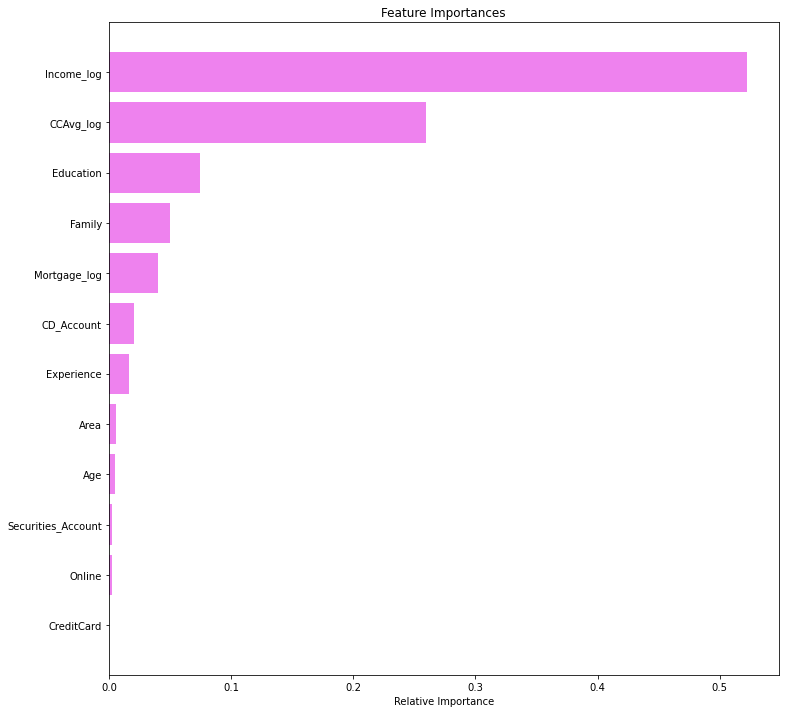

In [111]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Insights:

Feature importance plot is showing the total importance of each feature in tree building. 

## 10. Misclassification analysis

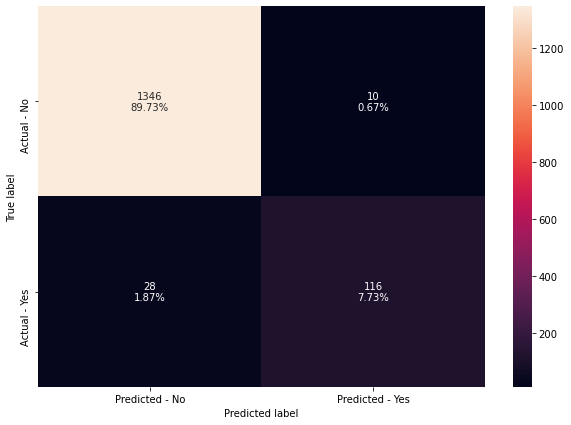

In [112]:
## Confusion matrix for our final model
make_confusion_matrix(estimator,y_test,X_test)

* Misclassification rate (%): The percentage of incorrectly classified instances are nothing, but the misclassification rate of the classifier and can be calculated as

* Misclassification rate=False positives+false negatives/Total instances


In [113]:
roc_auc_test = roc_auc_score(y_test, estimator.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, estimator.predict_proba(X_test)[:,1])
fnr =[]

for a in tpr:
    fnri= 1-a
    fnr.append(fnri)
    
missclassification_rate = (fpr + fnr)/len(y_test)
print(f'Miss-classification rate is {len(missclassification_rate)}')



Miss-classification rate is 9


No handles with labels found to put in legend.


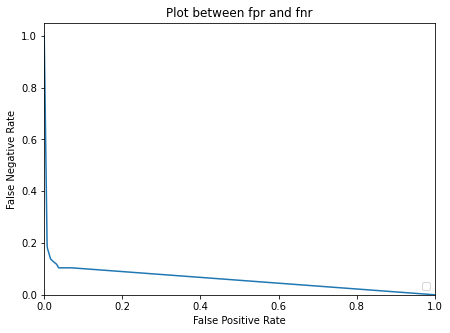

In [114]:
plt.figure(figsize=(7,5))
plt.plot(fpr, fnr)


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('False Negative Rate')
plt.title('Plot between fpr and fnr')
plt.legend(loc="lower right")
plt.show()

#### Insights:

False Negative Rate is higher for lower false positives and vice versa.

## 11. Actionable Insights & Recommendations

####  1. Comparision of both models:

#### Metrics from Decision Tree
 * Accuracy on training set :  0.9911428571428571
 * Accuracy on test set :  0.9746666666666667
 * Recall on training set :  0.9077380952380952
 * Recall on test set :  0.8055555555555556
 * Precision on training set :  1.0
 * Precision on test set :  0.9206349206349206
 * F1 on training set :  0.9516380655226209
 * F1 on test set :  0.8592592592592592
 
#### Metrics from Logistic Regression

* Accuracy on train data: 0.9385714285714286
* Accuracy on test data: 0.9346666666666666
* Recall on train data: 0.676737160120846
* Recall on test data: 0.610738255033557
* Precision on train data: 0.6746987951807228
* Precision on test data: 0.6946564885496184
* F1 Score on train data: 0.6757164404223227
* F1 Score on test data: 0.65
* ROC-AUC Score on train data: 0.8213285043267531
* ROC-AUC Score on test data: 0.7905652785160383
 
#### As per the metrics, decision Tree model performs much better in our case. 



#### 2.  Recommendation for business

* As per decision tree, `Income` is the most important feature and same logistic regression model reflected. So marketing team
should target people with higher salaries.
* Second most important feature is`CCAvg` so marketing team should consider people who have higher spending on credit card per month.
* `Education`, `Mortgage` and `family` are next highly important feature so marketing team should target people with advance education, high mortgage or large family size.
* `CD_account` and `exprience` are next important feature so marketing team can further focus on these features.


